# TCC WASM -  Análise Estatiscas

Análise dos dados de execução do processamento de detecção de faces compilados com WebAssembly versus compilação nativa com visual C++. O objetivo desta pesqusias em constatar a diferença de performance entre um código compilado p/ WebAssembly e outro com compilaçção nativa.

## Ferramentas para analise

In [102]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Dados de testes

O conjunto de dados de teste é formado por três vídeos selecionados a partir do *site* YouTube.
Os critérios de seleção foram: ser um video de acesso publico, ou seja, sem restrições para reprodução e estar 
disponível em formato MPEG-4 com resolução padrão de 1920px por 1080px.

In [103]:
df_dataset = pd.read_csv('./data/dataset.csv')
df_dataset

,id,extension,resolution,frames,fps,youtube_link
0,DATASET_1,mp4,1920x1080,3915,24,https://www.youtube.com/watch?v=EWUdGRAwUpY
1,DATASET_2,mp4,1920x1080,3020,30,https://www.youtube.com/watch?v=vQtLX6pW5eA
2,DATASET_3,mp4,1920x1080,12296,50,https://www.youtube.com/watch?v=RuL5jVqc4Tg


## Resultados

Foram feitos testes com uma aplicação nativa usado o Windows10 e com WebAssembly usando Chrome 75 e Firefox 67 executando no mesmo sistema operacional e maquina fisica com as configuraçãoes padrão de instalação. 

In [104]:
df_meta_fd = pd.read_csv('./data/META_LOG_FACE_DETECT.csv')
df_meta_fd

,workload,dataset,resolution,system,total_frames,total_frames_processeds,test_total_time_ms,log_file


## Carregar dados de teste




In [105]:
#dataset_1
df_d1sc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_SMALL_Chrome_75_Windows.csv')
df_d1mc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_MEDIUM_Chrome_75_Windows.csv')
df_d1lc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_LARGE_Chrome_75_Windows.csv')
df_d1sf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_SMALL_Firefox_68_Windows.csv')
df_d1mf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_MEDIUM_Firefox_68_Windows.csv')
df_d1lf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_LARGE_Firefox_68_Windows.csv')
df_d1swin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_SMALL_WINDOWS_10_WIN32.csv')
df_d1mwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_MEDIUM_WINDOWS_10_WIN32.csv')
df_d1lwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_1_LARGE_WINDOWS_10_WIN32.csv')

#dataset_2
df_d2sc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_SMALL_Chrome_75_Windows.csv')
df_d2mc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_MEDIUM_Chrome_75_Windows.csv')
df_d2lc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_LARGE_Chrome_75_Windows.csv')
df_d2sf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_SMALL_Firefox_68_Windows.csv')
df_d2mf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_MEDIUM_Firefox_68_Windows.csv')
df_d2lf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_LARGE_Firefox_68_Windows.csv')
df_d2swin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_SMALL_WINDOWS_10_WIN32.csv')
df_d2mwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_MEDIUM_WINDOWS_10_WIN32.csv')
df_d2lwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_2_LARGE_WINDOWS_10_WIN32.csv')

#dataset_3
df_d3sc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_SMALL_Chrome_75_Windows.csv')
df_d3mc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_MEDIUM_Chrome_75_Windows.csv')
df_d3lc = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_LARGE_Chrome_75_Windows.csv')
df_d3sf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_SMALL_Firefox_68_Windows.csv')
df_d3mf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_MEDIUM_Firefox_68_Windows.csv')
df_d3lf = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_LARGE_Firefox_68_Windows.csv')
df_d3swin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_SMALL_WINDOWS_10_WIN32.csv')
df_d3mwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_MEDIUM_WINDOWS_10_WIN32.csv')
df_d3lwin = pd.read_csv('./data/LOG_FACE_DETECT_DATASET_3_LARGE_WINDOWS_10_WIN32.csv')

frames_ds1 =[df_d1sc, df_d1mc, df_d1lc, df_d1sf, df_d1mf, df_d1lf, df_d1swin, df_d1mwin, df_d1lwin]
df_ds1 = pd.concat(frames_ds1, sort=False)
frames_ds2 =[df_d2sc, df_d2mc, df_d2lc, df_d2sf, df_d2mf, df_d2lf, df_d2swin, df_d2mwin, df_d2lwin]
df_ds2 = pd.concat(frames_ds2, sort=False)
frames_ds3 =[df_d3sc, df_d3mc, df_d3lc, df_d3sf, df_d3mf, df_d3lf, df_d3swin, df_d3mwin, df_d3lwin]
df_ds3 = pd.concat(frames_ds3, sort=False)

## Selecionar dados de teste

O criterio de uniformização dos dados é considerar apenas as medições que tiveram o mesmo numero de rostos detectados,
para fazer isso é necessario identificar qual a quantidade de rostos detectados mais comuns que seja diferente de zero.

In [106]:
ds1_faces_detected_rank = df_ds1[df_ds1["faces_detected"] > 0]['faces_detected'].value_counts()
ds2_faces_detected_rank = df_ds2[df_ds2["faces_detected"] > 0]['faces_detected'].value_counts()
ds3_faces_detected_rank = df_ds3[df_ds3["faces_detected"] > 0]['faces_detected'].value_counts()
print("DATASET_1 - Rank com a quantidade mais comum de rostos detectados:")
print(ds1_faces_detected_rank)
print("DATASET_2 - Rank com a quantidade mais comum de rostos detectados:")
print(ds2_faces_detected_rank)
print("DATASET_3 - Rank com a quantidade mais comum de rostos detectados:")
print(ds3_faces_detected_rank)

DATASET_1 - Rank com a quantidade mais comum de rostos detectados:
1    4258
2    1177
3      43
4       1
Name: faces_detected, dtype: int64
DATASET_2 - Rank com a quantidade mais comum de rostos detectados:
1    2381
2     939
3     216
4      42
5       4
Name: faces_detected, dtype: int64
DATASET_3 - Rank com a quantidade mais comum de rostos detectados:
1    9769
2    3354
3    1936
4     787
5     110
6      11
Name: faces_detected, dtype: int64


In [107]:
#dataset_1
df_ds1 = df_ds1[df_ds1["faces_detected"] == ds1_faces_detected_rank.head(1).index[0]]
df_ds1 = df_ds1.drop(columns=['id','workload','faces_detected','eyes_detected','workload'])

#dataset_2
df_ds2 = df_ds2[df_ds2["faces_detected"] == ds2_faces_detected_rank.head(1).index[0]]
df_ds2 = df_ds2.drop(columns=['id','workload','faces_detected','eyes_detected','workload'])

#dataset_3
df_ds3 = df_ds3[df_ds3["faces_detected"] == ds3_faces_detected_rank.head(1).index[0]]
df_ds3 = df_ds3.drop(columns=['id','workload','faces_detected','eyes_detected','workload'])

## Aalise Estatística

### Dados de teste - DATASET_1

In [108]:
#dataset,process_time_ms,pre_time_ms,tag_time_ms,pos_time_ms,total_time_ms,system,resolution_label
df_ds1_group = df_ds1.groupby(['dataset','system', 'resolution_label'])
df_ds1_st = df_ds1_group[
    ['process_time_ms','pre_time_ms','tag_time_ms','pos_time_ms','total_time_ms']
].agg([np.mean, np.median])
df_ds1_st

process_time_ms          \
                                                         mean  median   
dataset   system             resolution_label                           
DATASET_1 Chrome_75_Windows  LARGE                1004.373656  1069.5   
                             MEDIUM                436.275862   428.0   
                             SMALL                 209.431217   196.0   
          Firefox_68_Windows LARGE                 877.011364   901.0   
                             MEDIUM                374.342857   371.0   
                             SMALL                 161.719577   161.0   
          WINDOWS_10_WIN32   LARGE                 237.211765   243.0   
                             MEDIUM                109.181926   107.0   
                             SMALL                  58.470588    53.0   

                                              pre_time_ms        tag_time_ms  \
                                                     mean median        mean   
dataset   system             resolution_label                                  
DATASET_1 Chrome_75_Windows  LARGE               3.295699      3    0.000000   
                             MEDIUM              1.143236      1    0.000000   
                             SMALL               0.121693      0    0.000000   
          Firefox_68_Windows LARGE               5.136364      5    0.090909   
                             MEDIUM              1.891429      2    0.085714   
                             SMALL               0.743386      1    0.066138   
          WINDOWS_10_WIN32   LARGE               8.104706      8    0.000000   
                             MEDIUM              4.033294      4    0.001189   
                             SMALL               1.410513      1    0.002503   

                                                     pos_time_ms         \
                                              median        mean median   
dataset   system             resolution_label                             
DATASET_1 Chrome_75_Windows  LARGE                 0    0.000000      0   
                             MEDIUM                0    0.000000      0   
                             SMALL                 0    0.000000      0   
          Firefox_68_Windows LARGE                 0    0.000000      0   
                             MEDIUM                0    0.005714      0   
                             SMALL                 0    0.002646      0   
          WINDOWS_10_WIN32   LARGE                 0    2.129412      2   
                             MEDIUM                0    0.653983      1   
                             SMALL                 0    0.020025      0   

                                              total_time_ms          
                                                       mean  median  
dataset   system             resolution_label                        
DATASET_1 Chrome_75_Windows  LARGE              1041.973118  1103.5  
                             MEDIUM              463.838196   454.0  
                             SMALL               233.465608   218.5  
          Firefox_68_Windows LARGE               920.465909   944.0  
                             MEDIUM              407.200000   402.0  
                             SMALL               190.359788   190.5  
          WINDOWS_10_WIN32   LARGE               252.448235   259.0  
                             MEDIUM              116.802616   114.0  
                             SMALL                61.245307    56.0

### Dados de teste - DATASET_2

In [109]:
#dataset,process_time_ms,pre_time_ms,tag_time_ms,pos_time_ms,total_time_ms,system,resolution_label
df_ds2_group = df_ds2.groupby(['dataset','system', 'resolution_label'])
df_ds2_st=df_ds2_group[
    ['process_time_ms','pre_time_ms','tag_time_ms','pos_time_ms','total_time_ms']
].agg([np.mean, np.median])
df_ds2_st

process_time_ms         \
                                                         mean median   
dataset   system             resolution_label                          
DATASET_2 Chrome_75_Windows  LARGE                1466.236842   1428   
                             MEDIUM                603.477912    595   
                             SMALL                 240.628415    240   
          Firefox_68_Windows LARGE                1221.322581   1158   
                             MEDIUM                445.507042    440   
                             SMALL                 177.854701    179   
          WINDOWS_10_WIN32   LARGE                 315.472509    317   
                             MEDIUM                127.859848    127   
                             SMALL                  71.474576     62   

                                              pre_time_ms        tag_time_ms  \
                                                     mean median        mean   
dataset   system             resolution_label                                  
DATASET_2 Chrome_75_Windows  LARGE               3.357143      3    0.000000   
                             MEDIUM              1.096386      1    0.000000   
                             SMALL               0.049180      0    0.000000   
          Firefox_68_Windows LARGE               5.903226      5    0.096774   
                             MEDIUM              1.577465      2    0.070423   
                             SMALL               0.641026      1    0.051282   
          WINDOWS_10_WIN32   LARGE               7.501718      7    0.000000   
                             MEDIUM              3.723485      3    0.003788   
                             SMALL               1.355932      1    0.000000   

                                                     pos_time_ms         \
                                              median        mean median   
dataset   system             resolution_label                             
DATASET_2 Chrome_75_Windows  LARGE                 0    0.000000      0   
                             MEDIUM                0    0.004016      0   
                             SMALL                 0    0.000000      0   
          Firefox_68_Windows LARGE                 0    0.000000      0   
                             MEDIUM                0    0.000000      0   
                             SMALL                 0    0.008547      0   
          WINDOWS_10_WIN32   LARGE                 0    2.201031      2   
                             MEDIUM                0    0.662879      1   
                             SMALL                 0    0.025424      0   

                                              total_time_ms          
                                                       mean  median  
dataset   system             resolution_label                        
DATASET_2 Chrome_75_Windows  LARGE              1504.657895  1465.5  
                             MEDIUM              630.911647   623.0  
                             SMALL               263.934426   264.0  
          Firefox_68_Windows LARGE              1267.645161  1210.0  
                             MEDIUM              477.028169   473.0  
                             SMALL               204.923077   206.0  
          WINDOWS_10_WIN32   LARGE               330.067010   332.0  
                             MEDIUM              134.962121   134.0  
                             SMALL                74.418079    65.0

### Dados de teste - DATASET_3

In [110]:
#dataset,process_time_ms,pre_time_ms,tag_time_ms,pos_time_ms,total_time_ms,system,resolution_label
df_ds3_group = df_ds3.groupby(['dataset','system', 'resolution_label'])
df_ds3_st = df_ds3_group[
    ['process_time_ms','pre_time_ms','tag_time_ms','pos_time_ms','total_time_ms']
].agg([np.mean, np.median])
df_ds3_st

process_time_ms         \
                                                         mean median   
dataset   system             resolution_label                          
DATASET_3 Chrome_75_Windows  LARGE                 780.048518  748.0   
                             MEDIUM                424.700767  403.0   
                             SMALL                 212.462054  199.0   
          Firefox_68_Windows LARGE                 713.181818  667.5   
                             MEDIUM                385.408907  370.0   
                             SMALL                 172.647295  167.0   
          WINDOWS_10_WIN32   LARGE                 225.871334  214.0   
                             MEDIUM                101.048990   99.0   
                             SMALL                  56.804082   54.0   

                                              pre_time_ms        tag_time_ms  \
                                                     mean median        mean   
dataset   system             resolution_label                                  
DATASET_3 Chrome_75_Windows  LARGE               3.336927      3    0.000000   
                             MEDIUM              1.171355      1    0.000000   
                             SMALL               0.109375      0    0.000000   
          Firefox_68_Windows LARGE               5.045455      5    0.045455   
                             MEDIUM              2.174089      2    0.117409   
                             SMALL               0.863727      1    0.076152   
          WINDOWS_10_WIN32   LARGE               8.415722      8    0.001173   
                             MEDIUM              3.967464      3    0.000000   
                             SMALL               1.542041      1    0.000000   

                                                     pos_time_ms         \
                                              median        mean median   
dataset   system             resolution_label                             
DATASET_3 Chrome_75_Windows  LARGE                 0    0.000000      0   
                             MEDIUM                0    0.000000      0   
                             SMALL                 0    0.000000      0   
          Firefox_68_Windows LARGE                 0    0.000000      0   
                             MEDIUM                0    0.012146      0   
                             SMALL                 0    0.000000      0   
          WINDOWS_10_WIN32   LARGE                 0    2.601877      2   
                             MEDIUM                0    0.925206      1   
                             SMALL                 0    0.000000      0   

                                              total_time_ms         
                                                       mean median  
dataset   system             resolution_label                       
DATASET_3 Chrome_75_Windows  LARGE               820.768194  791.0  
                             MEDIUM              456.268542  433.0  
                             SMALL               239.321429  225.0  
          Firefox_68_Windows LARGE               753.810606  706.5  
                             MEDIUM              420.655870  403.0  
                             SMALL               202.468938  197.0  
          WINDOWS_10_WIN32   LARGE               242.164646  231.0  
                             MEDIUM              108.477562  106.0  
                             SMALL                59.782857   57.0

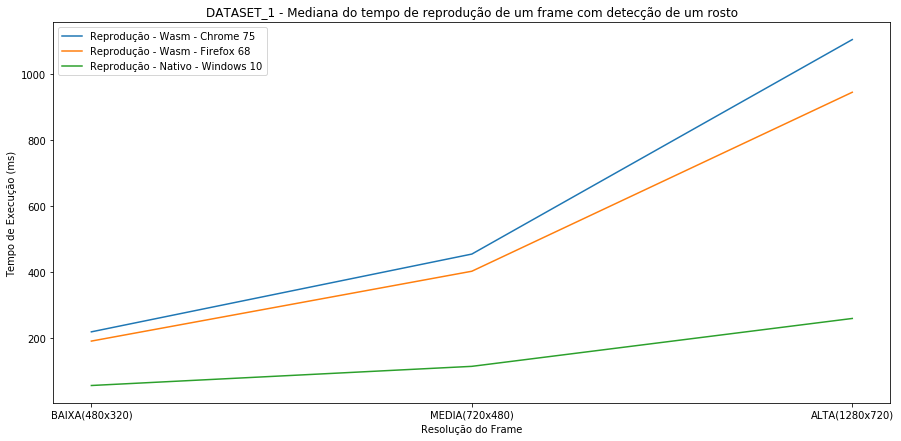

In [111]:
total_c = df_ds1_st.loc['DATASET_1','Chrome_75_Windows']['total_time_ms']['median'].sort_values()
total_f = df_ds1_st.loc['DATASET_1','Firefox_68_Windows']['total_time_ms']['median'].sort_values()
total_w = df_ds1_st.loc['DATASET_1','WINDOWS_10_WIN32']['total_time_ms']['median'].sort_values()
activity = ["BAIXA(480x320)", "MEDIA(720x480)", "ALTA(1280x720)"]

plt.rcParams["figure.figsize"] = (15,7)

fig, ax1 = plt.subplots()
ax1.plot(activity, total_c, label="Reprodução - Wasm - Chrome 75")
ax1.plot(activity, total_f, label="Reprodução - Wasm - Firefox 68")
ax1.plot(activity, total_w, label="Reprodução - Nativo - Windows 10")
ax1.legend()

plt.xlabel('Resolução do Frame')
plt.ylabel('Tempo de Execução (ms)')
plt.title("DATASET_1 - Mediana do tempo de reprodução de um frame com detecção de um rosto")
plt.legend()

plt.show()

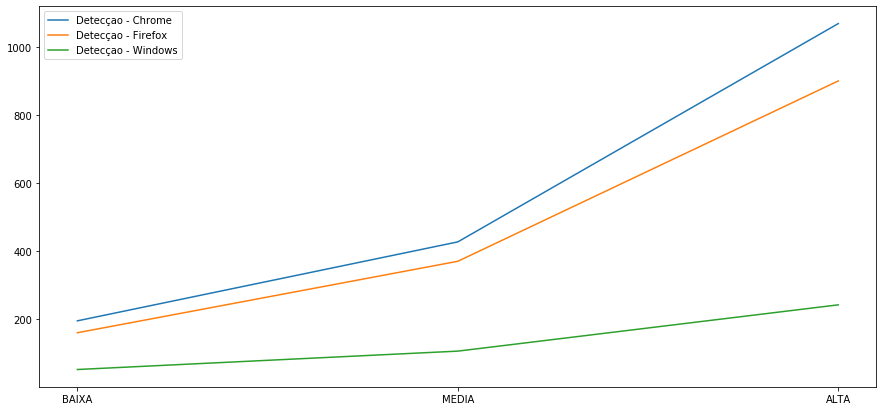

In [112]:
pro_c = df_ds1_st.loc['DATASET_1','Chrome_75_Windows']['process_time_ms']['median'].sort_values()
pro_f = df_ds1_st.loc['DATASET_1','Firefox_68_Windows']['process_time_ms']['median'].sort_values()
pro_w = df_ds1_st.loc['DATASET_1','WINDOWS_10_WIN32']['process_time_ms']['median'].sort_values()
activity = ["BAIXA", "MEDIA", "ALTA"]

fig, ax = plt.subplots()
ax.plot(activity, pro_c, label="Detecçao - Chrome")
ax.plot(activity, pro_f, label="Detecçao - Firefox")
ax.plot(activity, pro_w, label="Detecçao - Windows")
ax.legend()

plt.show()

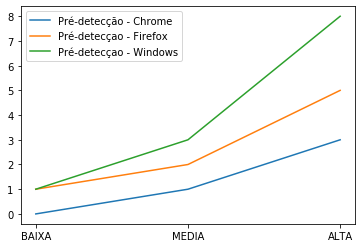

In [48]:
pre_c = df_ds3_st.loc['DATASET_3','Chrome_75_Windows']['pre_time_ms']['median'].sort_values()
pre_f = df_ds3_st.loc['DATASET_3','Firefox_68_Windows']['pre_time_ms']['median'].sort_values()
pre_w = df_ds3_st.loc['DATASET_3','WINDOWS_10_WIN32']['pre_time_ms']['median'].sort_values()
activity = ["BAIXA", "MEDIA", "ALTA"]

fig, ax = plt.subplots()
ax.plot(activity, pre_c, label="Pré-detecção - Chrome")
ax.plot(activity, pre_f, label="Pré-detecçao - Firefox")
ax.plot(activity, pre_w, label="Pré-detecçao - Windows")
ax.legend()

plt.show()

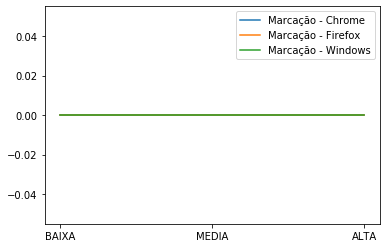

In [44]:
tag_c = df_ds1_st.loc['DATASET_1','Chrome_75_Windows']['tag_time_ms']['median'].sort_values()
tag_f = df_ds1_st.loc['DATASET_1','Firefox_68_Windows']['tag_time_ms']['median'].sort_values()
tag_w = df_ds1_st.loc['DATASET_1','WINDOWS_10_WIN32']['tag_time_ms']['median'].sort_values()
activity = ["BAIXA", "MEDIA", "ALTA"]

fig, ax = plt.subplots()
ax.plot(activity, tag_c, label="Marcação - Chrome")
ax.plot(activity, tag_f, label="Marcação - Firefox")
ax.plot(activity, tag_w, label="Marcação - Windows")
ax.legend()

plt.show()

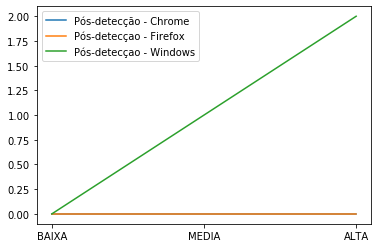

In [47]:
pos_c = df_ds1_st.loc['DATASET_1','Chrome_75_Windows']['pos_time_ms']['median'].sort_values()
pos_f = df_ds1_st.loc['DATASET_1','Firefox_68_Windows']['pos_time_ms']['median'].sort_values()
pos_w = df_ds1_st.loc['DATASET_1','WINDOWS_10_WIN32']['pos_time_ms']['median'].sort_values()
activity = ["BAIXA", "MEDIA", "ALTA"]

fig, ax = plt.subplots()
ax.plot(activity, pos_c, label="Pós-detecção - Chrome")
ax.plot(activity, pos_f, label="Pós-detecçao - Firefox")
ax.plot(activity, pos_w, label="Pós-detecçao - Windows")
ax.legend()

plt.show()